# Verificador Entregas
 
1. Abrir carpetas de entrega AulaDigital
2. Convertir cuadernos a python con nbconvert
3. Comparar para similaridad

## Uso

Copiar este cuaderno en la raiz de la carpeta donde se descomprimió la entrega en Aula Digital, luego ejecutarlo todo.


In [12]:
%reset -sf

extensions = [
    '.py',
    'otra_ext'
]

evaluacion = "Trabajo 2"
enunciado = '''
desarrollo del análisis de posición corregido en todos los aspectos (forma y fondo): a. Imagen y descripción del mecanismo b. Análisis cinemático: teoría c. Solución de las ecuaciones de posición por métodos numéricos para un rango de valores d. Presentación de la información por medio de gráficas e. Gráfica de una posición del mecanismo	

Animación del mecanismo para el rango de movimiento escogido: las barras no se deforman, la animación cumbre el rango de movimiento analizado.	

Análisis de velocidad y aceleración - teoría: Punto a, punto b (ver lineamientos).	

Análisis de velocidad - solución analítica y numérica: punto a, punto b (ver lineamientos).	

Análisis de aceleración - solución analítica y numérica: punto a, punto b (ver lineamientos).	
'''

import os
from pathlib import Path

import tkinter as tk
from  tkinter import filedialog

root = tk.Tk()
root.withdraw()

''

## Procesar carpeta con archivos comprimidos o con carpetas descomprimidas

Requiere: 
- una carpeta con los .zip generados por Aula Digital
    - Con esta opción, descomprime los .zip y genera carpetas con consecutivos
o
- una carpeta con las subcarpetas de las evaluaciones.
    - Con esta opción, solo identifica las subcarpetas
    
El resultado es la lista ```basepaths```

In [13]:
rootpath = Path(filedialog.askdirectory())
# rootpath = Path(r"C:\Users\000092114\UPB\Fundamentos de Computacion 2022-20 - Profesores - Profesores\_notas\seg1\Test")
basepaths = []
content = rootpath.glob('*/')
contList = [Path(x) for x in content]
folders = [x for x in contList if x.is_dir()]
files = [x for x in contList if x.is_file() and x.suffix == ".zip"]
# print(folders)
# print(files)
# generateNB = False
if folders == [] and files != []: # si no se ha descomprimido nada y hay .zips por descomprimir
    from zipfile import ZipFile
    grupo = 1
    # ahora se define el nombre de la carpeta con un consecutivo.
    for file in files:
        # Create a ZipFile Object and load sample.zip in it
        with ZipFile(str(file), 'r') as zipObj:
           # Extract all the contents of zip file in different directory
            zipObj.extractall(file.parent/str(grupo))
#             generateNB = True
        basepaths.append(file.parent/str(grupo))
        grupo += 1
elif folders != []:
    basepaths = folders

In [14]:
print(rootpath)
print(basepaths)

C:\Users\000092114\UPB\Mecanismos - General\2022_20\_notas\Trabajo 2-1022222
[WindowsPath('C:/Users/000092114/UPB/Mecanismos - General/2022_20/_notas/Trabajo 2-1022222/Agudelo Feriz Valentina_2814363_assignsubmission_file_'), WindowsPath('C:/Users/000092114/UPB/Mecanismos - General/2022_20/_notas/Trabajo 2-1022222/Calao Jimenez Valentina_2814377_assignsubmission_file_'), WindowsPath('C:/Users/000092114/UPB/Mecanismos - General/2022_20/_notas/Trabajo 2-1022222/Chacon Gallego David_2814382_assignsubmission_file_'), WindowsPath('C:/Users/000092114/UPB/Mecanismos - General/2022_20/_notas/Trabajo 2-1022222/Gallego Alzate Daniel_2814379_assignsubmission_file_'), WindowsPath('C:/Users/000092114/UPB/Mecanismos - General/2022_20/_notas/Trabajo 2-1022222/Madrid Rangel Juan Manuel_2814376_assignsubmission_file_'), WindowsPath('C:/Users/000092114/UPB/Mecanismos - General/2022_20/_notas/Trabajo 2-1022222/Ortega Castaño Sebastian_2814366_assignsubmission_file_'), WindowsPath('C:/Users/000092114/UPB/

## Procesar los archivos

Esta versión es solo para cuadernos de Jupyter.

In [15]:
pathList,nameList,nbList = list(),list(),list()
basepath = rootpath
# for basepath in basepaths:
for entry in os.listdir(basepath):
    entry = Path(entry)
    print(entry)
    if str(entry).endswith("_assignsubmission_file_"): # Descomentar para Tareas
#     if True:  # Descomentar para Cuestionarios
        #recoja todos los archivos de cada entrega
        pathList.append(basepath/entry)
        p = pathList[-1].glob("**/*")
        for i,x in enumerate(p):
            #solo guarde los que estén en la lista de extensiones (para evitar que coja los cuadernos)
            if x.is_file() and x.suffix == ".ipynb":
                #agregue el path de la carpeta a la lista de paths
                nbList.append(x)
                #agregue el nombre a la lista de nombres (extraido del nombre de la entrega)
                nameList.append(str(entry).split("_")[0])
#             nbList.append([x for x in p if x.is_file() and x.suffix == ".ipynb"])

Agudelo Feriz Valentina_2814363_assignsubmission_file_
Calao Jimenez Valentina_2814377_assignsubmission_file_
Chacon Gallego David_2814382_assignsubmission_file_
Gallego Alzate Daniel_2814379_assignsubmission_file_
Madrid Rangel Juan Manuel_2814376_assignsubmission_file_
Ortega Castaño Sebastian_2814366_assignsubmission_file_
Ospina Jaramillo Pablo_2814375_assignsubmission_file_
Perez De Los Rios Leonardo_2814374_assignsubmission_file_
Regalado Chicaiza Sebastian Mauricio_2814369_assignsubmission_file_
Rincon Gutierrez Daniel_2814372_assignsubmission_file_
Sierra Guerrero Jose Francisco_2814373_assignsubmission_file_
Silva Rios Valeria_2814371_assignsubmission_file_
Tamayo Agudelo David_2814380_assignsubmission_file_
Vahos Serna Julio Cesar_2814364_assignsubmission_file_
Vanegas Diaz Sofia_2814381_assignsubmission_file_
Vega Rodriguez Santiago_2814368_assignsubmission_file_
White Restrepo Tomas_2814383_assignsubmission_file_
Zuluaga Aristizabal Andres_2814378_assignsubmission_file_


In [16]:
print(nbList,nameList,len(nbList),len(nameList))
    # leer el contenido del archivo como texto
    #print(scriptList[-1][-1].read_text())

[WindowsPath('C:/Users/000092114/UPB/Mecanismos - General/2022_20/_notas/Trabajo 2-1022222/Agudelo Feriz Valentina_2814363_assignsubmission_file_/Untitled6 - copia (2) (1).ipynb'), WindowsPath('C:/Users/000092114/UPB/Mecanismos - General/2022_20/_notas/Trabajo 2-1022222/Calao Jimenez Valentina_2814377_assignsubmission_file_/Trabajo 2_Valentina Calao Jimenez_.ipynb'), WindowsPath('C:/Users/000092114/UPB/Mecanismos - General/2022_20/_notas/Trabajo 2-1022222/Chacon Gallego David_2814382_assignsubmission_file_/Trabajo 2 - David Chacon.ipynb'), WindowsPath('C:/Users/000092114/UPB/Mecanismos - General/2022_20/_notas/Trabajo 2-1022222/Gallego Alzate Daniel_2814379_assignsubmission_file_/velocidad_y_aceleracion.ipynb'), WindowsPath('C:/Users/000092114/UPB/Mecanismos - General/2022_20/_notas/Trabajo 2-1022222/Madrid Rangel Juan Manuel_2814376_assignsubmission_file_/JuanMecanismoT2.ipynb'), WindowsPath('C:/Users/000092114/UPB/Mecanismos - General/2022_20/_notas/Trabajo 2-1022222/Ortega Castaño S

## Creación de scripts a partir de cuadernos

In [22]:
from unidecode import unidecode

def remover_caracteres_esp(nomArchivo):
    '''
    reemplaza caracteres especiales por ascii, tanto del nombre como del interior. 
    Usar con cuidado.
    '''
    archivo =  open(nomArchivo,encoding="UTF-8")
    texto = archivo.read()
    texto = unidecode(texto)
    archivo.close()
    nuevoArchivo = Path(unidecode(str(nomArchivo),"utf-8"))
    try:
        archivo = open(nuevoArchivo,'x+',encoding="UTF-8")
    except Exception as e:
        print(e)
        return None
    nomArchivo.unlink()
    archivo.write(texto)
    archivo.close()
    return nuevoArchivo

def genScripts(nombres,cuadernos,limpiar):
    listaScripts = []
    for cuaderno in cuadernos:
        try:
#             print(cuaderno)
#                 codeText = script.read_text(encoding="utf8")
            nombre = cuaderno.parts[-2].split('_')[0]
            fullNombre = nombre + ".py"
            print(fullNombre)
            fullNombre = cuaderno.parent/fullNombre
            if not fullNombre.exists():
                cuaderno = remover_caracteres_esp(cuaderno)
                if cuaderno is not None:
                    !jupyter nbconvert --to script "{cuaderno}" --output "{nombre}"
            else:
                if limpiar:
                    fullNombre.unlink()
        except Exception as e:
            print(f"fallo conversion de cuaderno en {cuaderno}")
            print("error: ",e)
            continue
        listaScripts.append(fullNombre)        
    return listaScripts

In [18]:
# Testing

# testPath = Path(r"C:\Users\LMAG\UPB\Mecanismos - General\2022_20\_notas\_old\Taller 4 Andréçs Zuluaga - copia.ipynb")
# testPath = remover_caracteres_esp(testPath)

# scriptList = []
# nombre = nbList[1].parts[-2].split('_')[0]
# print(nombre)
# fullNombre = nombre + ".py"
# fullNombre = nbList[1].parent/fullNombre
# print(fullNombre)
# scriptList.append(fullNombre)
# print(fullNombre.exists())
# cuaderno = remover_caracteres_esp(nbList[1])
# cuaderno.exists()

In [25]:
scriptPaths = genScripts(nameList,nbList,False)

Agudelo Feriz Valentina.py
[Errno 17] File exists: 'C:\\Users\\000092114\\UPB\\Mecanismos - General\\2022_20\\_notas\\Trabajo 2-1022222\\Agudelo Feriz Valentina_2814363_assignsubmission_file_\\Untitled6 - copia (2) (1).ipynb'
Calao Jimenez Valentina.py
[Errno 17] File exists: 'C:\\Users\\000092114\\UPB\\Mecanismos - General\\2022_20\\_notas\\Trabajo 2-1022222\\Calao Jimenez Valentina_2814377_assignsubmission_file_\\Trabajo 2_Valentina Calao Jimenez_.ipynb'
Chacon Gallego David.py
[Errno 17] File exists: 'C:\\Users\\000092114\\UPB\\Mecanismos - General\\2022_20\\_notas\\Trabajo 2-1022222\\Chacon Gallego David_2814382_assignsubmission_file_\\Trabajo 2 - David Chacon.ipynb'
Gallego Alzate Daniel.py
[Errno 17] File exists: 'C:\\Users\\000092114\\UPB\\Mecanismos - General\\2022_20\\_notas\\Trabajo 2-1022222\\Gallego Alzate Daniel_2814379_assignsubmission_file_\\velocidad_y_aceleracion.ipynb'
Madrid Rangel Juan Manuel.py
[Errno 17] File exists: 'C:\\Users\\000092114\\UPB\\Mecanismos - Genera

In [9]:
# !jupyter nbconvert --to script "C:/Users/000092114/UPB/Mecanismos - General/2022_20/_notas/Taller Ecuaciones de cierre vectorial-866496/Zuluaga Aristizabal Andres_2771430_assignsubmission_file_/Zuluaga Aristizabal Andres.py"
# print(scriptPaths)

### Limpiar códigos de comentarios.

 

In [8]:
import re


def stripComments(code):
    code = str(code)
    return re.sub(r'(?m)^ *#.*\n?', '', code)
def stripLines(code,lines):
    return ''.join(code.splitlines())[lines:]

for i,script_base in enumerate(scriptPaths):
    try:
        archivo = open(script_base,encoding='UTF-8')
    except:
        scriptPaths.pop(i)
        print("revisar: ",nameList[i])
        nameList.pop(i)
        continue
    codigo = archivo.read()
    archivo.close()
    archivo = open(script_base,'w',encoding='UTF-8')
    codigo = stripComments(codigo)
    archivo.write(codigo)

In [9]:
print(nameList,scriptPaths)

print(len(nameList),len(scriptPaths))

['Agudelo Feriz Valentina', 'Calao Jimenez Valentina', 'Chacon Gallego David', 'Gallego Alzate Daniel', 'Madrid Rangel Juan Manuel', 'Ortega Castaño Sebastian', 'Ospina Jaramillo Pablo', 'Perez De Los Rios Leonardo', 'Regalado Chicaiza Sebastian Mauricio', 'Rincon Gutierrez Daniel', 'Sierra Guerrero Jose Francisco', 'Silva Rios Valeria', 'Tamayo Agudelo David', 'Vahos Serna Julio Cesar', 'Vanegas Diaz Sofia', 'Vega Rodriguez Santiago', 'White Restrepo Tomas', 'Zuluaga Aristizabal Andres'] [WindowsPath('C:/Users/000092114/UPB/Mecanismos - General/2022_20/_notas/Trabajo 2-1022222/Agudelo Feriz Valentina_2814363_assignsubmission_file_/Agudelo Feriz Valentina.py'), WindowsPath('C:/Users/000092114/UPB/Mecanismos - General/2022_20/_notas/Trabajo 2-1022222/Calao Jimenez Valentina_2814377_assignsubmission_file_/Calao Jimenez Valentina.py'), WindowsPath('C:/Users/000092114/UPB/Mecanismos - General/2022_20/_notas/Trabajo 2-1022222/Chacon Gallego David_2814382_assignsubmission_file_/Chacon Galleg

### Verificar similaridad

Correr estas celdas individualmente.
1. Conformar la lista de scripts y estudiantes consolidada
2. correr la celda para generar el mapa de similaridad

In [10]:
# generar mapa de similaridad
from difflib import SequenceMatcher
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics


In [11]:
try:
    print(umbral,'%')
    print(similarStdev,'%')
except:
    umbral = 90 #porcentaje de similitud

dimension = len(scriptPaths)
similarity = np.zeros((dimension,dimension))
mostSimilar = []
flatSimilar = []
for i,script_base in enumerate(scriptPaths):
    for j,script_cmp in enumerate(scriptPaths):
        with open(script_base, errors='ignore',encoding='UTF-8') as fileA,open(script_cmp, errors='ignore',encoding='UTF-8') as fileB:
            fileAData = fileA.read()
#             fileAData = stripComments(fileAData)
            fileBData = fileB.read()
#             fileBData = stripComments(fileBData)
            similarity[[i],[j]] = int(SequenceMatcher(None, fileAData,fileBData).ratio()*100)
            if similarity[[i],[j]]>umbral and j>i: #solo tomar a la derecha de la diagonal.
                mostSimilar.append([script_base,script_cmp,similarity[[i],[j]][0]])
                print( f"{script_base.parts[-2].split('_')[0]} se asemeja en: {similarity[i][j]:.0f} % a {script_cmp.parts[-2].split('_')[0]}.")
            if j>i:
                flatSimilar.append(similarity[[i],[j]][0])

similarStdev = statistics.stdev(flatSimilar)
similarMean = statistics.mean(flatSimilar)
umbral = int(similarMean+(similarStdev)*2)
df = pd.DataFrame(similarity, columns = nameList, index = nameList)
print(similarMean,similarStdev)

ValueError: Shape of passed values is (17, 17), indices imply (18, 18)

In [9]:
# percSimilar = dict((i,item) for i,item in enumerate(mostSimilar))
# print(percSimilar)    
# print(fileAData)

## Por hacer

Generar una lista de parejas de personas con similaridad mayor a cierto umbral, luego llamar al comparador con interfaz gráfica: https://github.com/yebrahim/pydiff

- Generar parejas de similares con mayor a umbral
- Verificar uso de la herramienta llamada desde cli.
- Sistematizar la revisión de comparación

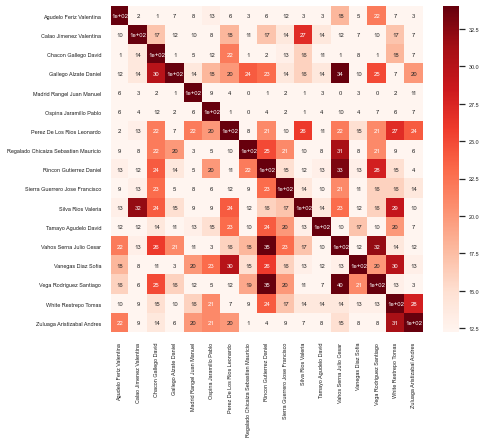

In [58]:
# print(df)
sns.set(font_scale=0.5)
sns.set_palette("coolwarm")
figure = plt.gcf() # get current figure
figure.set_size_inches(7, 6)
mapa = sns.heatmap(df, annot=True, vmin = similarMean, vmax = max(flatSimilar),cmap = "Reds")
plt.savefig(rootpath/'mapaSimilaridad.pdf', dpi=300,bbox_inches='tight')

### Crear un cuaderno con todos los códigos para comparación y verificación de fraudes

In [61]:
import subprocess

for similar in mostSimilar:
    path1 = str(similar[0])
    path2 = str(similar[1])
    command = f'python pydiff.py -p "{path1}" "{path2}"'
#     print(command)
    try:
        subprocess.call(command, timeout = 1, shell=True)
    except:
        pass
#   os.system(command)
# nb = nbf.v4.new_notebook()
# for (estPath,estName,estScripts) in zip(pathList,nameList,scriptList):
#     celdas = conformarCeldas(nb,estName,estScripts)
    
#     nb['cells'] += celdas
# nbf.write(nb, 'RevisionEntregas.ipynb')

### Refs

https://nbviewer.org/gist/fperez/9716279

https://github.com/yebrahim/pydiff